# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/efrost/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
btc_articles

{'status': 'ok',
 'totalResults': 6593,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
   'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
   'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
   'publishedAt': '2021-09-16T13:26:42Z',
   'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"},
  {'source': {'id': 'tech

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
eth_articles

{'status': 'ok',
 'totalResults': 2699,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Lucas Matney',
   'title': 'Offchain Labs raises $120 million to hide Ethereum’s shortcomings with its Arbitrum product',
   'description': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized apps on the Ethereum blockchain. The popular network has see…',
   'url': 'http://techcrunch.com/2021/08/31/offchain-labs-raises-120-million-to-hide-ethereums-shortcomings-with-arbitrum-scaling-product/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/08/Image-from-iOS-5.jpg?w=533',
   'publishedAt': '2021-08-31T12:30:39Z',
   'content': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues fa

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-09-07,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.000,0.948
3,2021-09-07,The government of El Salvador purchased at lea...,0.1280,0.046,0.000,0.954
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.000,0.833
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
3,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.111425,0.062600,0.03300,0.904450
std,0.353293,0.041673,0.05330,0.057052
min,-0.709600,0.000000,0.00000,0.765000
25%,0.000000,0.044500,0.00000,0.881750
50%,0.128000,0.050500,0.00000,0.905500
75%,0.406800,0.094250,0.04575,0.948750
max,0.690800,0.161000,0.19500,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.199415,0.073050,0.026000,0.901050
std,0.354876,0.060995,0.049188,0.074667
min,-0.670500,0.000000,0.000000,0.694000
25%,0.000000,0.000000,0.000000,0.845000
50%,0.256400,0.078500,0.000000,0.906000
75%,0.445000,0.105250,0.037750,0.952500
max,0.735100,0.180000,0.169000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
nltk.download('stopwords')

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'the'}


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/efrost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df['text'].apply(tokenizer)

btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-09-07,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.000,0.948,"[recentlyinstalled, bitcoin, atm, today, bitco..."
3,2021-09-07,The government of El Salvador purchased at lea...,0.1280,0.046,0.000,0.954,"[government, el, salvador, purchased, least, b..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df['text'].apply(tokenizer)

eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.000,0.833,"[broader, crypto, world, enjoys, late, summer,..."
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694,"[opensea, isnt, wasting, much, time, head, pro..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
big_string_1 = btc_df['text'].str.cat()
processed_1 = tokenizer(big_string_1)
bigrams_1 = Counter(ngrams(processed_1, n=2))

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
big_string_2 = eth_df['text'].str.cat()
processed_2 = tokenizer(big_string_2)
bigrams_2 = Counter(ngrams(processed_2, n=2))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
top_10_btc = token_count(bigrams_1, 10)

top_10_btc

[(('el', 'salvador'), 8),
 (('buy', 'hold'), 3),
 (('hold', 'sell'), 3),
 (('central', 'american'), 3),
 (('american', 'country'), 3),
 (('became', 'first'), 3),
 (('adam', 'aron'), 2),
 (('charspaypal', 'allow'), 2),
 (('allow', 'user'), 2),
 (('allow', 'customer'), 2)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top_10_eth = token_count(bigrams_2, 10)

top_10_eth

[(('first', 'time'), 3),
 (('adam', 'aron'), 2),
 (('buy', 'hold'), 2),
 (('hold', 'sell'), 2),
 (('nonfungible', 'token'), 2),
 (('buterin', 'ha'), 2),
 (('broader', 'crypto'), 1),
 (('crypto', 'world'), 1),
 (('world', 'enjoys'), 1),
 (('enjoys', 'late'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

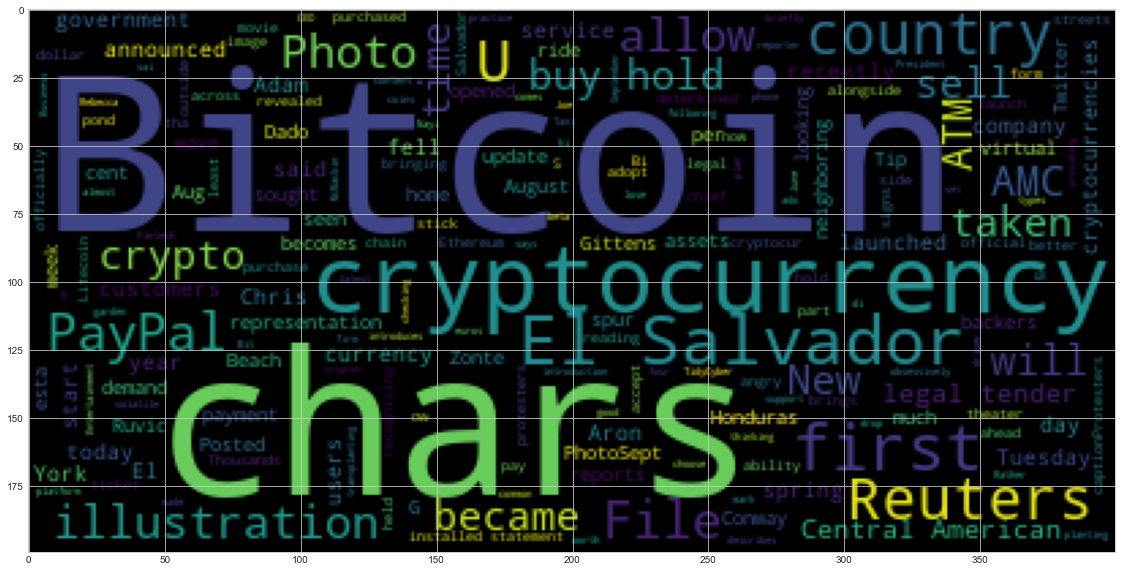

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc_btc = WordCloud().generate(big_string_1)
plt.imshow(wc_btc)

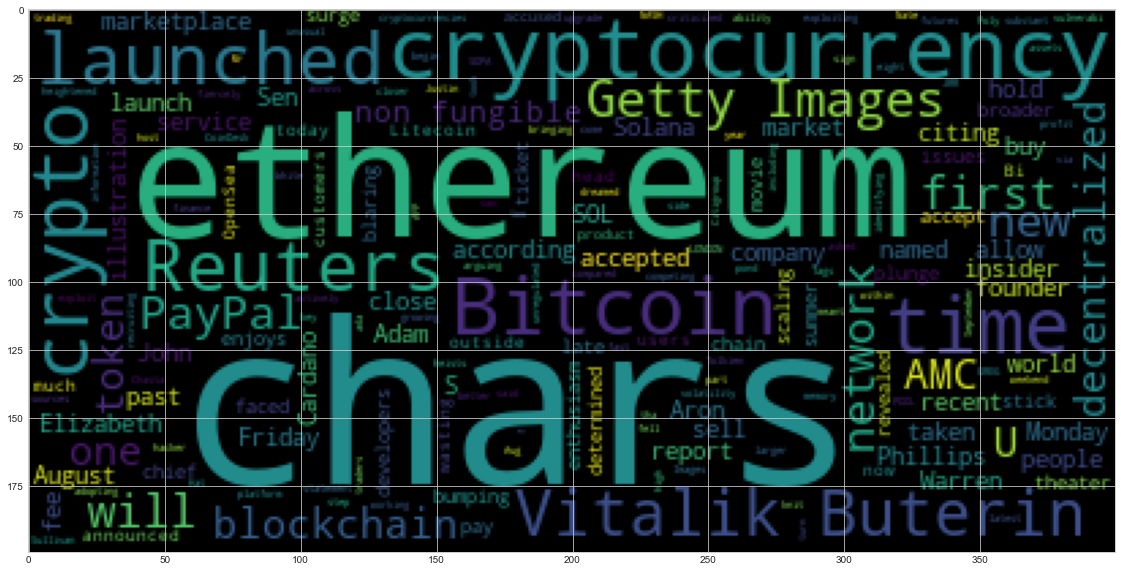

In [24]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_eth = WordCloud().generate(big_string_2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 1.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = (big_string_1)

In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_1 = nlp(bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!
doc_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [31]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_1, style='ent')

In [32]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_1.ents:
    print(ent.text)

AMC
Adam Aron
Ethereum
U.S.
first
today
U.K.
Bitcoin ATM
today
El Salvador
US
Central American
first
El Salvador
at least 200
Tuesday
a year
US
Thousands
El Salvador
Nayi
Joe
TidyCyber reporter
Chris
almost 2,500
2,100
Chris
chars]New York
CNN
a volatile day
about 10%
Tuesday
$43,000 mark
El Salvador
June
chars]8
just days
September
spring
Rebecca McMackin
August 6, 2021
REUTERS
Dado Ruvic/Illustration/File Photo/File Photo/File Photo/File PhotoSept 7
Reuters
UK
first
four
August 6, 2021
REUTERS
Dado Ruvic/Illustration/File
15
Reuters
Adam Aron
El Zonte
El Salvador
Bitcoin Beach
Central American
Conway G. Gittens
27
Reuters
first
ATM
Honduras
this week
El Salvador
first
27
Reuters
first
ATM
Honduras
this week
El Salvador
first
El Zonte
El Salvador
Bitcoin Beach
Central American
Conway G. Gittens
Twitter
Tip Jar
Twitter
earlier this year
as much as 17
a month
El Salvadors
as low as US$43,050
New York Tuesda
+4328
as much as 17
US$43,050 

San Salvador
Sept. 7
2021.Photo
Ma
first
$311 bi

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = (big_string_2)

In [34]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_2 = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
doc_2.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [35]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_2, style='ent')

In [36]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_2.ents:
    print(ent.text)

late summer
AMC
Adam Aron
Ethereum
U.S.
first
today
U.K.
Nate Chasta
+924
a year
US
Monday
Poly Network
White
Buterin
Vitalik Buterin
2013
Getty Images
John Phillips
Vitalik Buterin
eight
this past weekend
Elizabeth Warren
AFP
Getty Images
Elizabeth Warren
Sullivan
Getty Images
Citigroup
CoinDesk
two
one
25
Reuters
September
August 6, 2021
REUTERS
Dado Ruvic/Illustration/File
15
Reuters
Adam Aron
above $100
first
Monday
more than 200%
August
first
$311 billion
Q2 2021
Insider Intellige
2015
John Phillips
Vitalik Buterin
Time
100
the past decade
Kyle Russell
Playbyte
Last Friday
Dom Hofmann
one
Rosenfeld
FTX
500
NFT
Tuesday
Solana
seventh
Dogecoin
Elon Musk's
Ethereum
Reuters
NEW YORK
Sept 3
Reuters
second
Friday
4,000
first
May 15


---